1. Считайте датасет из файла

In [7]:
import pandas as pd
data = pd.read_csv('train.csv')

2. Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch

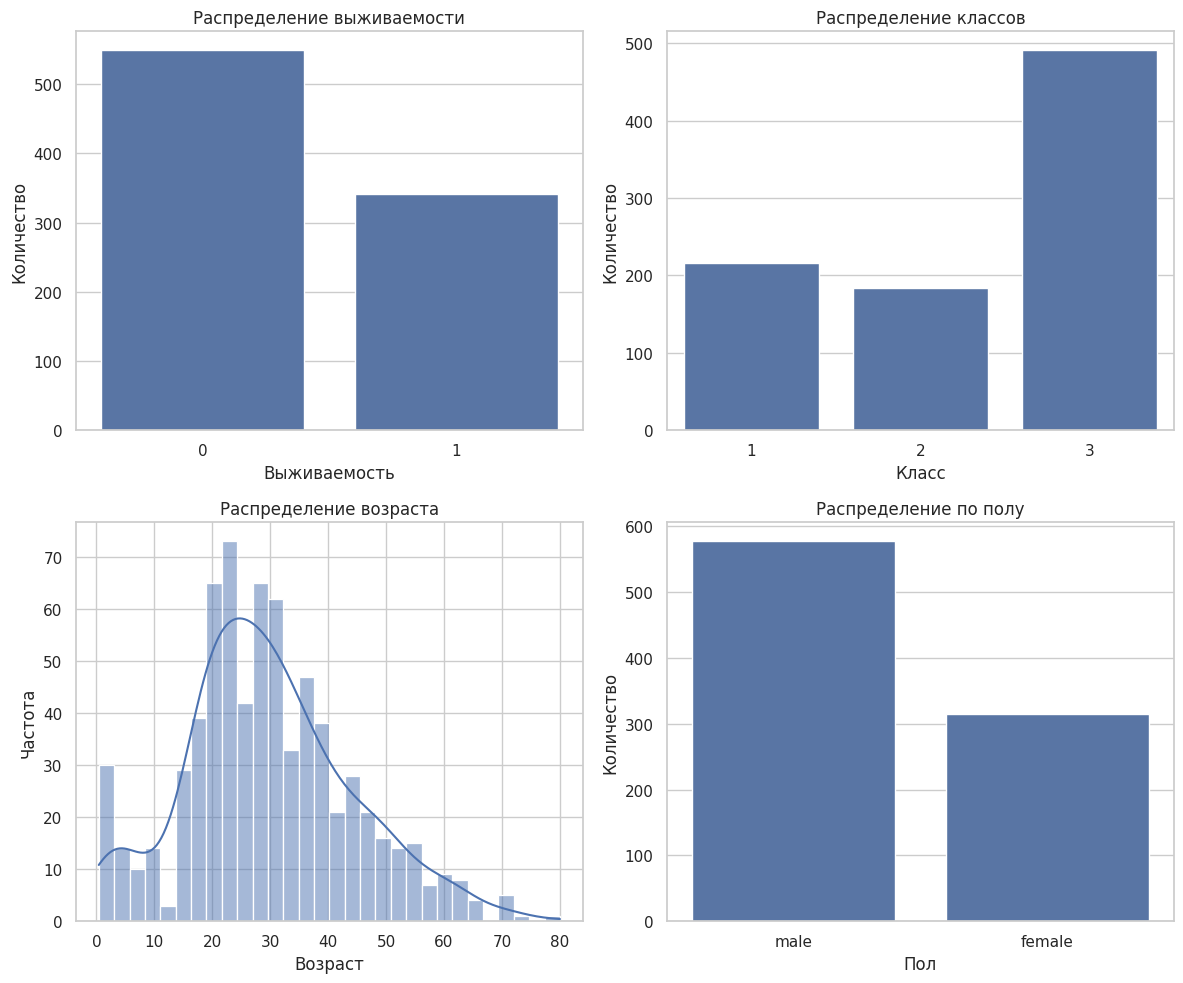

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(x='Survived', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Распределение выживаемости')
axes[0, 0].set_xlabel('Выживаемость')
axes[0, 0].set_ylabel('Количество')
sns.countplot(x='Pclass', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Распределение классов')
axes[0, 1].set_xlabel('Класс')
axes[0, 1].set_ylabel('Количество')
sns.histplot(data['Age'].dropna(), bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Распределение возраста')
axes[1, 0].set_xlabel('Возраст')
axes[1, 0].set_ylabel('Частота')
sns.countplot(x='Sex', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Распределение по полу')
axes[1, 1].set_xlabel('Пол')
axes[1, 1].set_ylabel('Количество')
plt.tight_layout()
plt.show()

3. Постройте график типа boxplot для столбца Age

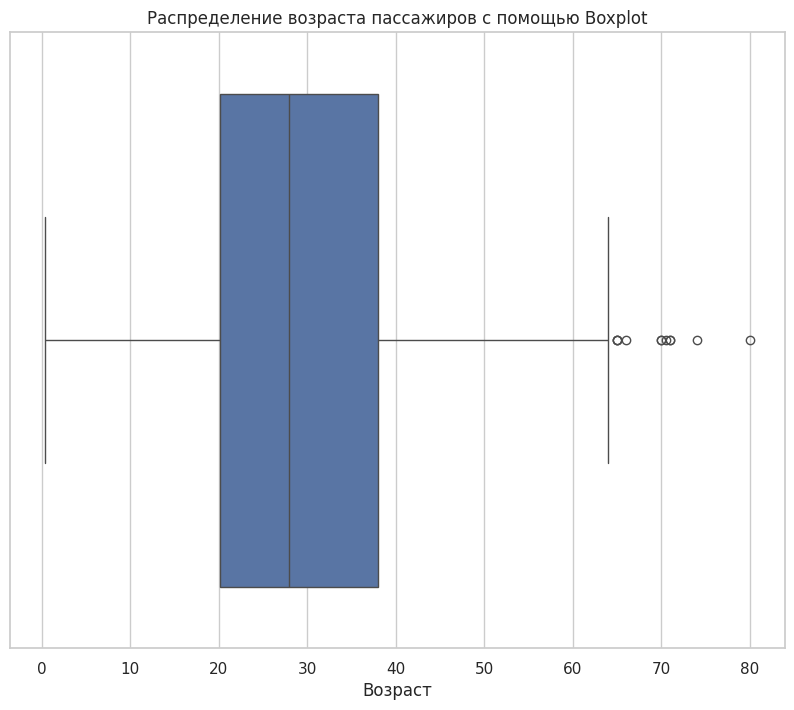

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Age', data=data)
plt.title ('Распределение возраста пассажиров с помощью Boxplot')
plt.xlabel('Возраст')
plt.show()

4. На графике выше можно увидеть распредление возраста пассажиров. Так, минимальный возраст пассажира составляет менее 1 года, средний возраст - примерно 27 лет, максимальный возраст - чуть больше 60 лет. Возраст большинства пассажиров судна составляет от 20 до 40 лет. Также есть несколько пассажиров с возрастом более 65 лет.

5. Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах

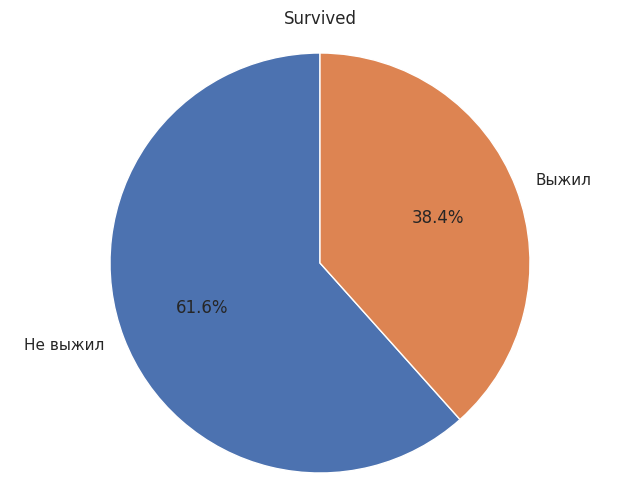

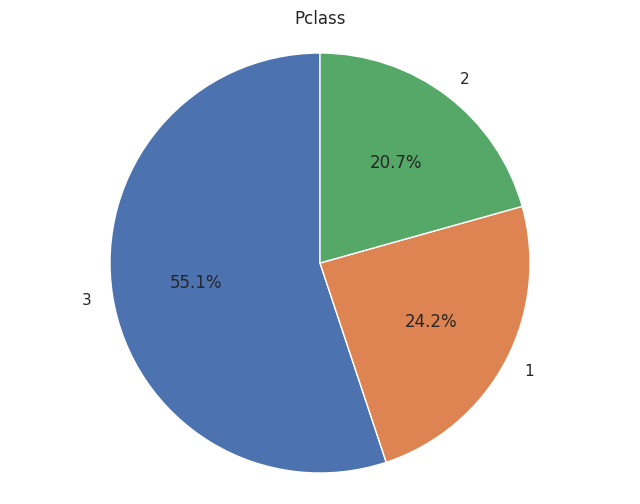

In [20]:
survived_counts = data['Survived'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['Не выжил', 'Выжил'], autopct='%1.1f%%', startangle=90)
plt.title('Survived')
plt.axis('equal')
plt.show()
pclass_counts = data['Pclass'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pclass')
plt.axis('equal')
plt.show()

6. Постройте график типа pairplot для всех числовых переменных датасета

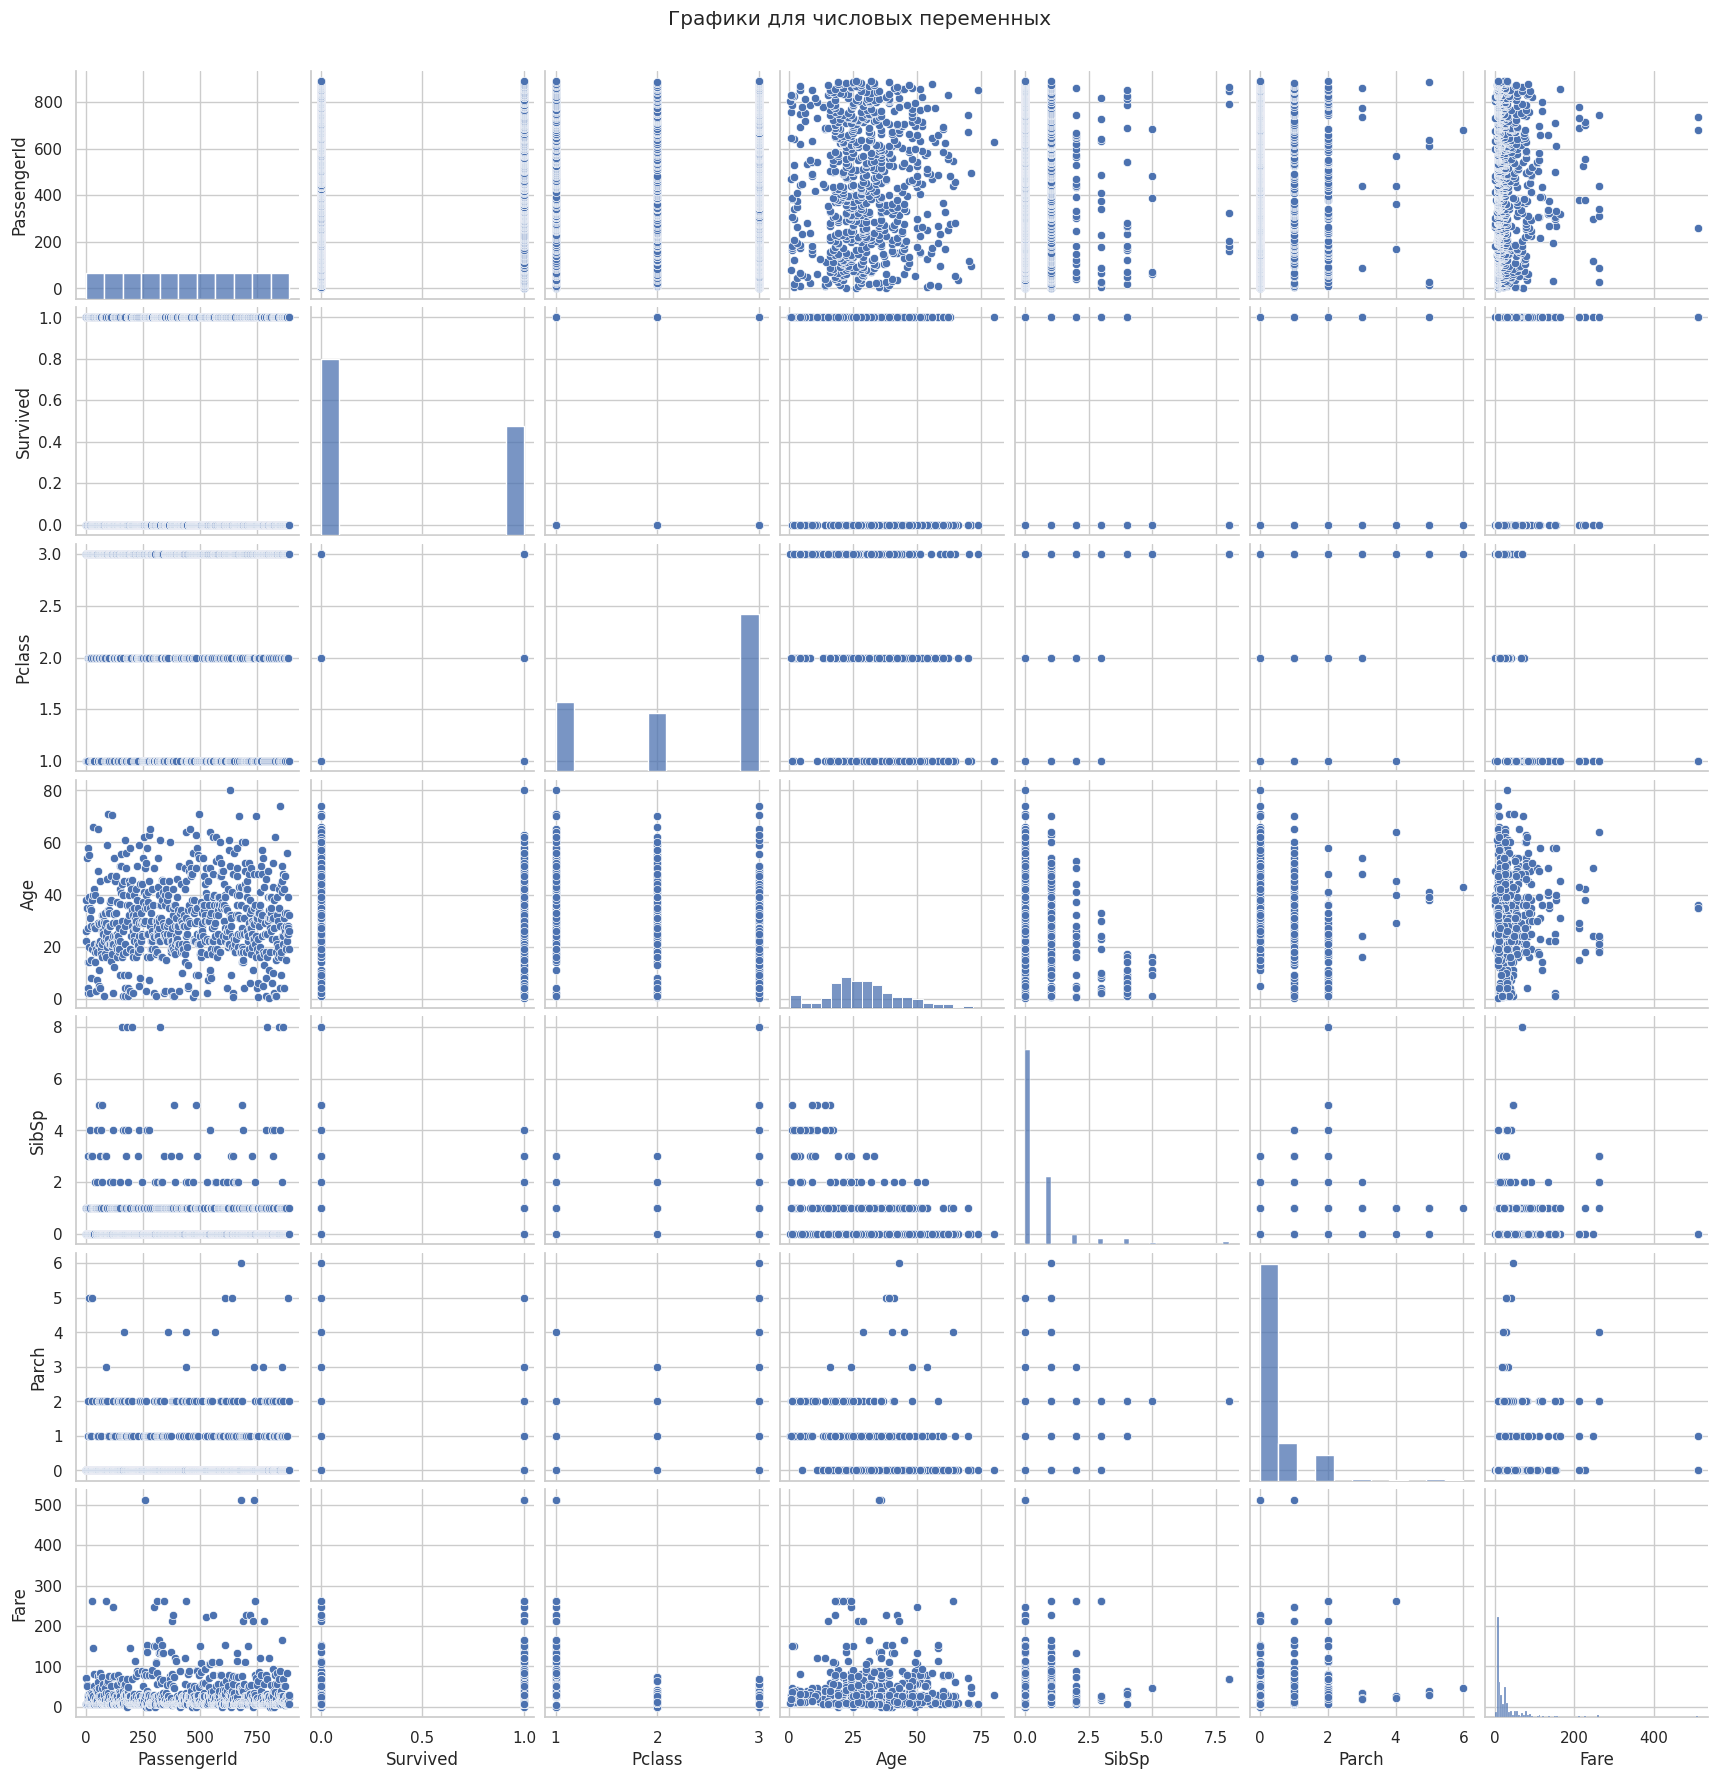

In [22]:
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Графики для числовых переменных', y=1.02)
plt.show()

7. Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе

In [24]:
import plotly.express as px
sunburst_data = data.groupby(['Pclass', 'Sex']).size().reset_index(name='count')
fig = px.sunburst(sunburst_data, path=['Pclass', 'Sex'], values='count', title='Визуализация иерархических данных по классам и полу')
fig.show()

In [25]:
fig.write_html("map.html")